In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
PATH = '/Users/vitaliykochetkov/Documents/netology/py-3_task_4.2/names/'

##### Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

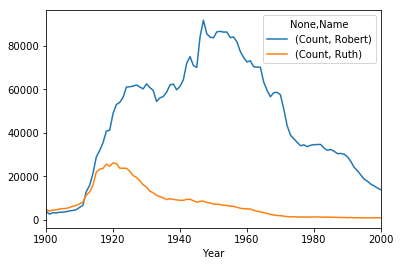

In [181]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(PATH + 'yob{}.txt'.format(year), names=['Name','Gender','Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()


##### Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, …, 1995, 2000).

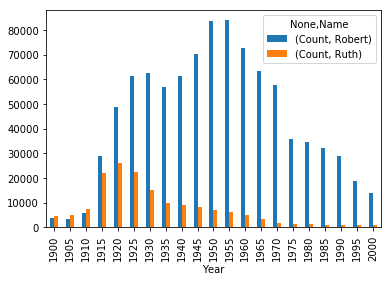

In [182]:
names_by_year_5y = {}
for year in range(1900, 2005, 5):
    names_by_year_5y[year] = pd.read_csv(PATH + 'yob{}.txt'.format(year), names=['Name','Gender','Count'])
names_all_5y = pd.concat(names_by_year_5y, names=['Year', 'Pos'])
name_dynamics_5y = names_all_5y.groupby([names_all_5y.index.get_level_values(0), 'Name']).sum()
name_dynamics_5y.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()


##### Построить круговую диаграмму по количеству употреблений для ТОП-10 имен, начинающихся на R, за 1950 год.

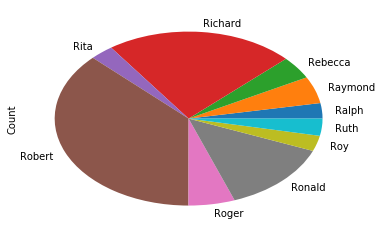

In [183]:
names_1950 = pd.read_csv(PATH + 'yob1950.txt', names=['Name','Gender','Count'])
names_1950['First_letter'] = names_1950.apply(lambda row: row.Name[0], axis=1)

df = names_1950.query('First_letter == "R"').sort_values(by='Count', ascending=False).head(10).groupby(['Name']).sum()
df.plot(y='Count', kind='pie', legend=False)


##### Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

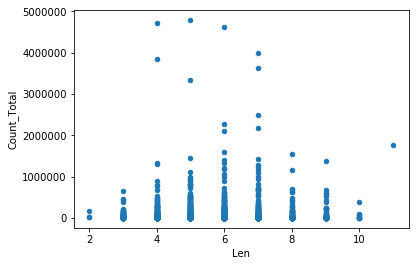

In [184]:
years = range(1900, 2001, 1)
cols = ['Name','Gender', 'Count_' + str(years[0])]
names_merge_years = pd.read_csv(PATH + 'yob' + str(years[0]) + '.txt', names=cols)
names_merge_years['Count_Total'] = names_merge_years['Count_' + str(years[0])]
names_merge_years = names_merge_years.drop(['Count_' + str(years[0])], axis=1)

for year in years[1:]:
    cols = ['Name','Gender', 'Count_' + str(year)]
    names_year = pd.read_csv(PATH + 'yob' + str(year) + '.txt', names=cols)
    names_merge_years = pd.merge(names_merge_years, names_year, on=['Name', 'Gender'])
    names_merge_years['Count_Total'] = names_merge_years['Count_Total'] + names_merge_years['Count_' + str(year)]
    names_merge_years = names_merge_years.drop(['Count_' + str(year)], axis=1)
    
names_merge_years['Len'] = names_merge_years.apply(lambda row: len(row.Name), axis=1)
names_merge_years.plot.scatter(x='Len', y='Count_Total')
